# Run optimization Analysis

In [3]:
from appdirs import os_name
! which python
import pandas as pd

file_path = 'wandb_export_2025-09-08T10_27_54.283+02_00.csv'
df = pd.read_csv(file_path)

df_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "dtypes": df.dtypes.astype(str).to_dict(),
    "head": df.head().to_dict()
}

df_info


/Users/kacpermarzol/miniconda3/envs/myenv/bin/python


{'shape': (73, 48),
 'columns': ['Name',
  'State',
  'Notes',
  'User',
  'Tags',
  'Created',
  'Runtime',
  'Sweep',
  'agent',
  'checkpoint.base_path',
  'checkpoint.enabled',
  'checkpoint.freq',
  'checkpoint.mode',
  'checkpoint.path',
  'checkpoint.resume',
  'entity',
  'entropy_coef',
  'eps_clip',
  'eval_episodes',
  'eval_max_steps',
  'eval_num_episodes',
  'gae_lambda',
  'gamma',
  'group',
  'learn_every',
  'learning_rate',
  'log_freq',
  'max_steps',
  'mini_batch_size',
  'num_episodes',
  'ppo_epochs',
  'project',
  'seed',
  'seed_list',
  'value_loss_coef',
  'wandb_id',
  'actor_loss',
  'critic_loss',
  'episode',
  'std_mean',
  'steps_total',
  'total_reward',
  'walker_0/effort',
  'walker_0/reward',
  'walker_1/effort',
  'walker_1/reward',
  'walker_2/effort',
  'walker_2/reward'],
 'dtypes': {'Name': 'object',
  'State': 'object',
  'Notes': 'object',
  'User': 'float64',
  'Tags': 'object',
  'Created': 'object',
  'Runtime': 'int64',
  'Sweep': 'floa

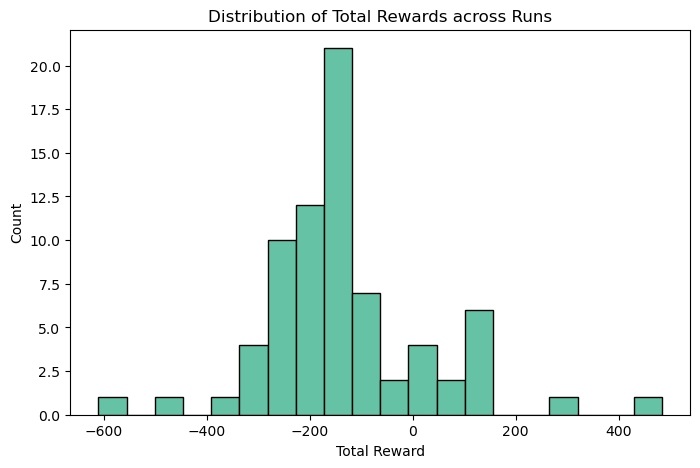

(                              Name  total_reward  learning_rate  entropy_coef  \
 5    ttrial_ppo_sensitivity_9-s430    484.549731       0.002403      0.021412   
 7    ttrial_ppo_sensitivity_9-s240    289.790795       0.002403      0.021412   
 40   ttrial_ppo_sensitivity_4-s240    154.133495       0.000045      0.006475   
 47    ttrial_ppo_sensitivity_3-s13    148.351030       0.001260      0.003337   
 34    ttrial_ppo_sensitivity_4-s33    139.134198       0.000045      0.006475   
 46   ttrial_ppo_sensitivity_3-s430    136.292625       0.001260      0.003337   
 6     ttrial_ppo_sensitivity_9-s13    125.470102       0.002403      0.021412   
 9      ttrial_ppo_sensitivity_7-s8    117.973598       0.002588      0.001439   
 0      ttrial_ppo_sensitivity_9-s8     89.962417       0.002403      0.021412   
 4   ttrial_ppo_sensitivity_9-s2137     48.369157       0.002403      0.021412   
 
        gamma  gae_lambda  
 5   0.977656    0.960369  
 7   0.977656    0.960369  
 40  0.98942

In [4]:
import matplotlib.pyplot as plt

# Sort runs by total_reward (descending = best)
best_runs = df.sort_values(by="total_reward", ascending=False).head(10)

# Sort runs by total_reward (ascending = worst)
worst_runs = df.sort_values(by="total_reward", ascending=True).head(10)

summary_stats = df[["total_reward", "actor_loss", "critic_loss", "std_mean", "steps_total"]].describe()


plt.figure(figsize=(8, 5))
plt.hist(df["total_reward"], bins=20, edgecolor="black")
plt.title("Distribution of Total Rewards across Runs")
plt.xlabel("Total Reward")
plt.ylabel("Count")
plt.show()

(best_runs[["Name", "total_reward", "learning_rate", "entropy_coef", "gamma", "gae_lambda"]],
 worst_runs[["Name", "total_reward", "learning_rate", "entropy_coef", "gamma", "gae_lambda"]],
 summary_stats)


# Observations
Best runs often used higher learning rates (0.0024) and moderate entropy coefficients (~0.02).
Gamma values close to 0.98–0.99 worked well.
Very high gamma (0.996–0.999) + low entropy often led to collapse.
Either too small or too high learning rates underperformed.

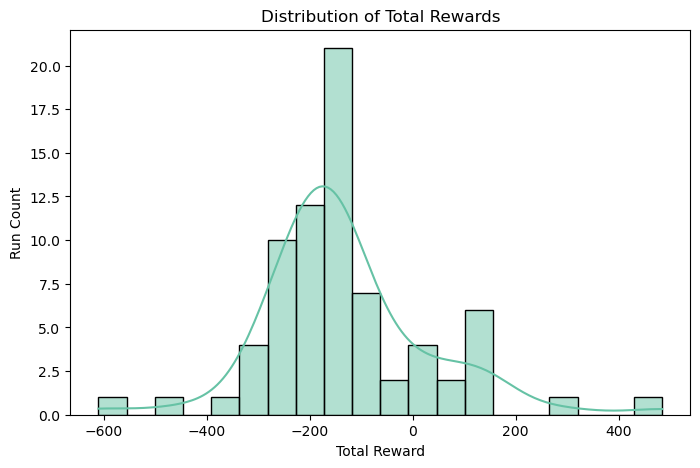

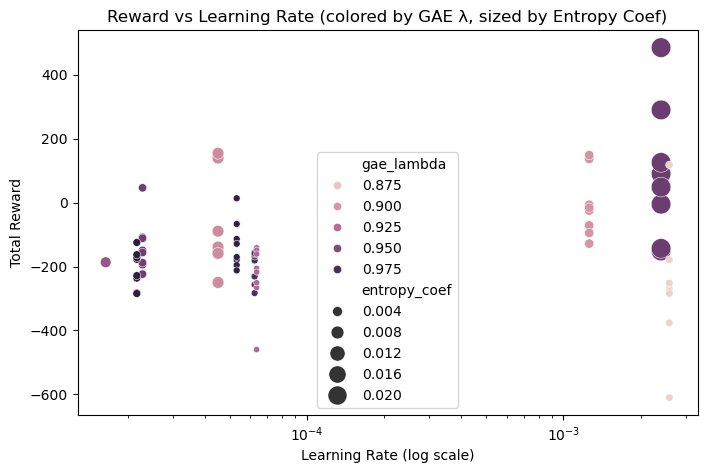

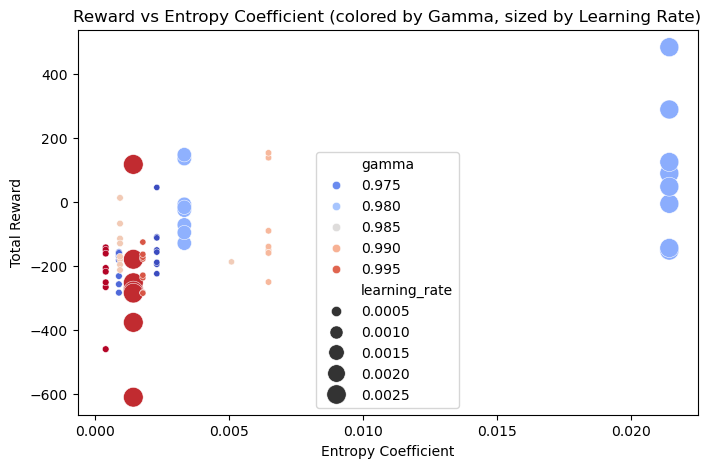

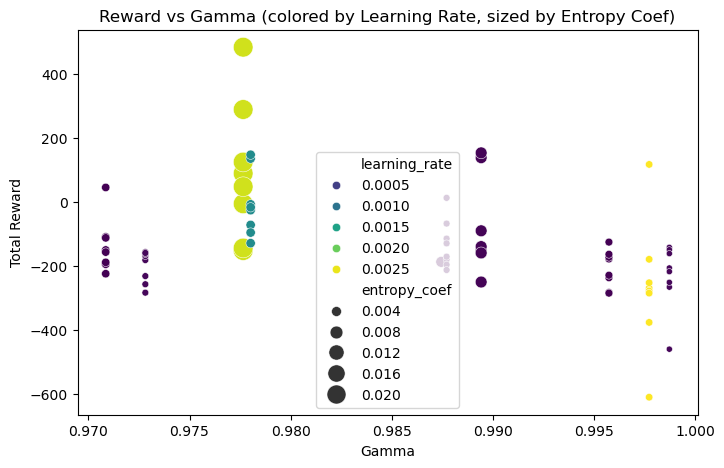

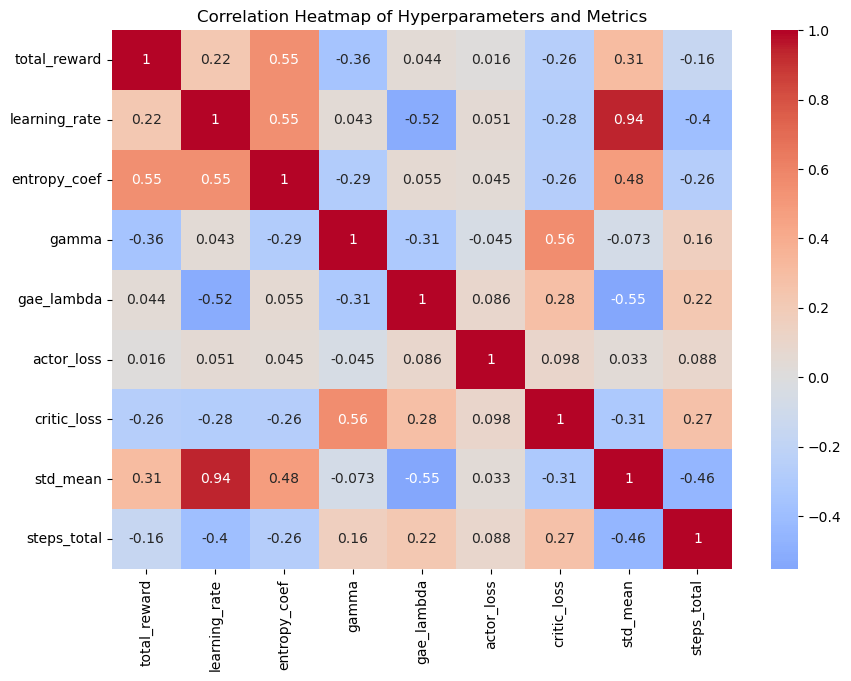

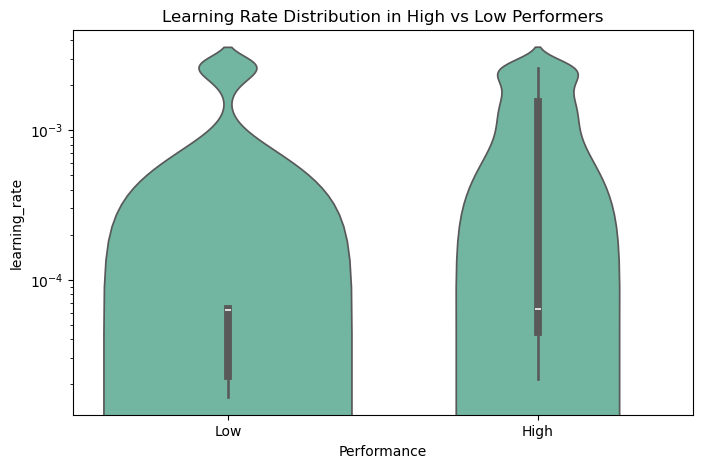

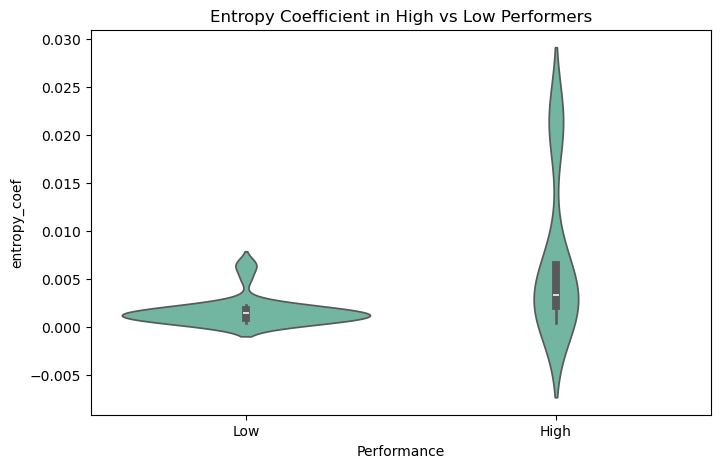

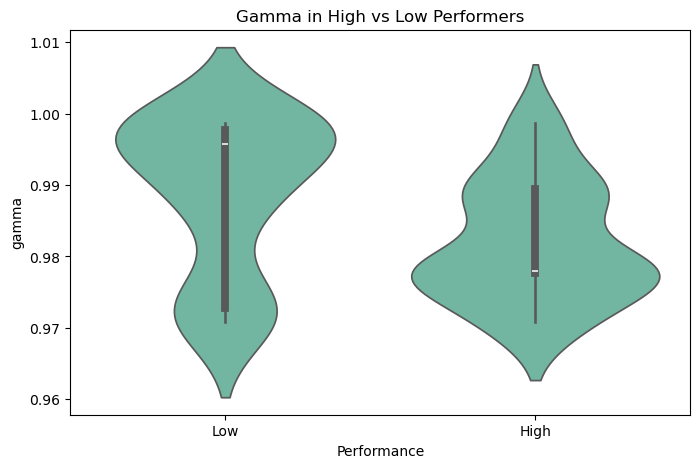

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("default")
sns.set_palette("Set2")

# 1. Distribution of rewards
plt.figure(figsize=(8,5))
sns.histplot(df["total_reward"], bins=20, kde=True)
plt.title("Distribution of Total Rewards")
plt.xlabel("Total Reward")
plt.ylabel("Run Count")
plt.show()

# 2. Reward vs Learning Rate
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="learning_rate",
    y="total_reward",
    hue="gae_lambda",
    size="entropy_coef",
    sizes=(20,200)
)
plt.xscale("log")
plt.title("Reward vs Learning Rate (colored by GAE λ, sized by Entropy Coef)")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Total Reward")
plt.show()

# 3. Reward vs Entropy Coefficient
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="entropy_coef",
    y="total_reward",
    hue="gamma",
    palette="coolwarm",
    size="learning_rate",
    sizes=(20,200)
)
plt.title("Reward vs Entropy Coefficient (colored by Gamma, sized by Learning Rate)")
plt.xlabel("Entropy Coefficient")
plt.ylabel("Total Reward")
plt.show()

# 4. Reward vs Gamma
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="gamma",
    y="total_reward",
    hue="learning_rate",
    palette="viridis",
    size="entropy_coef",
    sizes=(20,200)
)
plt.title("Reward vs Gamma (colored by Learning Rate, sized by Entropy Coef)")
plt.xlabel("Gamma")
plt.ylabel("Total Reward")
plt.show()

# 5. Correlation heatmap for numeric features
numeric_cols = [
    "total_reward",
    "learning_rate",
    "entropy_coef",
    "gamma",
    "gae_lambda",
    "actor_loss",
    "critic_loss",
    "std_mean",
    "steps_total"
]
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Hyperparameters and Metrics")
plt.show()

# 6. Top vs Bottom rewards violin plots
df["Performance"] = pd.qcut(df["total_reward"], q=2, labels=["Low", "High"])

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Performance", y="learning_rate", inner="box")
plt.yscale("log")
plt.title("Learning Rate Distribution in High vs Low Performers")
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Performance", y="entropy_coef", inner="box")
plt.title("Entropy Coefficient in High vs Low Performers")
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Performance", y="gamma", inner="box")
plt.title("Gamma in High vs Low Performers")
plt.show()



# Analysis

1. Distribution of Total Rewards
Most runs scored poorly (negative rewards), only a small portion of  runs achieved strong positive rewards.

2. Reward vs Learning Rate
Too small LR results in agents failing to learn.
Too high LR - unstable updates.

3. Reward vs Entropy Coefficient
Moderate entropy (circa 0.02) gave best rewards.
Very low entropy results in agents geting stuck in deterministic, poor policies.

4. Reward vs Gamma
Too much long-term discounting harmed performance.

5. Correlation Heatmap
Positive correlation: i.e learning rate with entropy coef
Negative correlation: i.e gae_lambda with learning rate

6. High vs Low Performers
High performers used larger learning rates and moderate entropy.
Low performers often had extreme gamma and small learning rates.


# Best Hyperparameter Ranges

1. Learning Rate:
* Best runs: ~0.001 – 0.003
* Too low (<1e-4) -> agents fail to learn
* Too high (>0.01) -> unstable
2. Entropy Coefficient:
* Best runs: 0.01 – 0.03
* Too low (<0.005) - no exploration - poor policies

3. Gamma :
* Best runs: 0.975 - 0.990
* Too close to 1 (≥0.996) -> agents overemphasized long-term reward, performance collapsed

4. GAE Lambda:
* Best runs: 0.90 - 0.96
* Balances bias and variance well


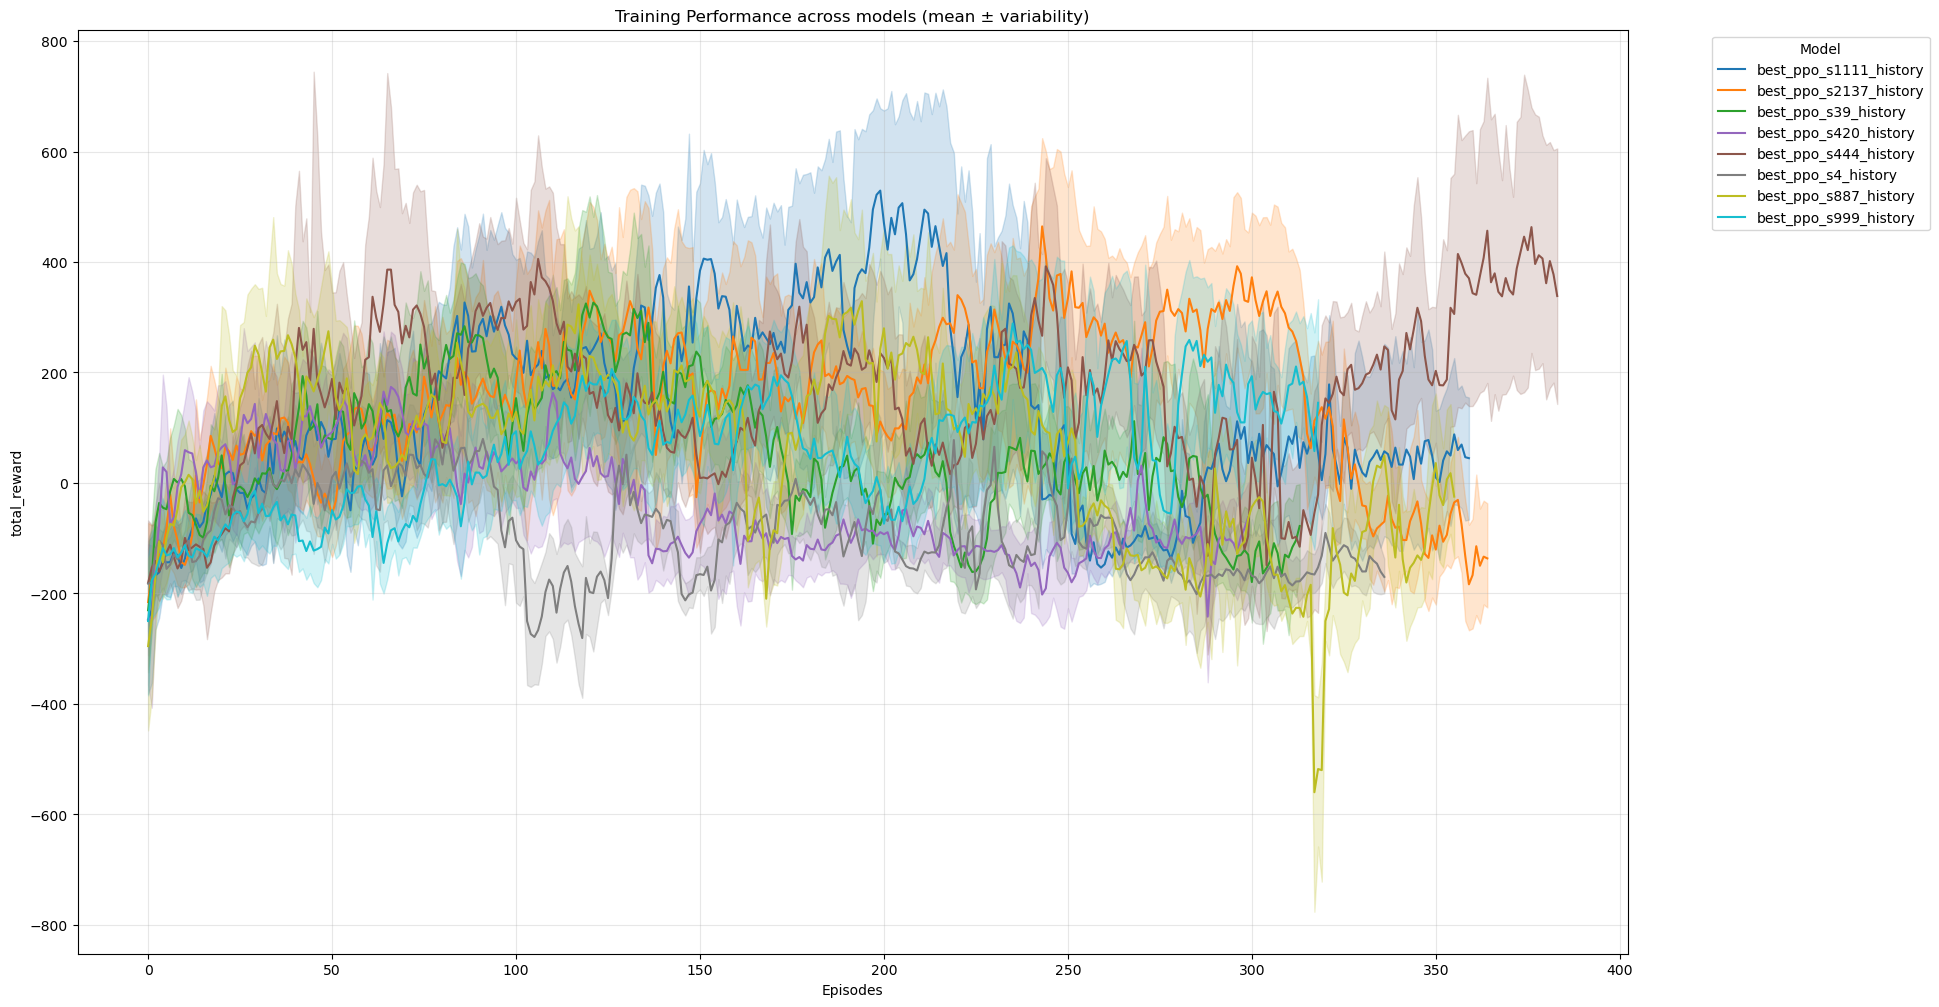

In [29]:
import glob
import os
import numpy as np

data_dir = "best_runs"
step_col = "steps_total"
metric_col = "total_reward"
bin_size = 1e4

plt.figure(figsize=(20, 12))

files = glob.glob(os.path.join(data_dir, "*.csv"))
colors = plt.cm.tab10(np.linspace(0, 1, len(files)))

for i, file in enumerate(sorted(files)):
    df = pd.read_csv(file)

    model_name = os.path.splitext(os.path.basename(file))[0]

    df["episode"] = (df[step_col] / bin_size).round().astype(int)

    grouped = (
        df.groupby("episode")
        .agg(
            mean_val=(metric_col, "mean"),
            p15=(metric_col, lambda x: np.percentile(x, 15)),
            p85=(metric_col, lambda x: np.percentile(x, 85)),
        )
        .reset_index()
    )
    plt.plot(grouped["episode"], grouped["mean_val"], color=colors[i], label=model_name)
    plt.fill_between(grouped["episode"], grouped["p15"], grouped["p85"], color=colors[i], alpha=0.2)

plt.title("Training Performance across models (mean ± variability)")
plt.xlabel("Episodes")
plt.ylabel(metric_col)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
# plt.tight_layout()
plt.show()
